# E-commerce Business Analytics Dashboard

A comprehensive analysis of e-commerce sales data focusing on business performance metrics, customer satisfaction, and operational efficiency.

## Table of Contents

1. [Introduction & Business Objectives](#introduction)
2. [Data Loading & Configuration](#data-loading)
3. [Data Dictionary](#data-dictionary)
4. [Data Preparation & Transformation](#data-preparation)
5. [Business Metrics Analysis](#business-metrics)
   - [Revenue Performance Analysis](#revenue-analysis)
   - [Product Category Performance](#product-analysis)
   - [Geographic Performance Analysis](#geographic-analysis)
   - [Customer Experience Analysis](#customer-analysis)
6. [Summary of Key Observations](#summary)

---

## 1. Introduction & Business Objectives {#introduction}

This analysis provides insights into e-commerce business performance through comprehensive examination of sales data. The primary objectives are:

- **Revenue Performance**: Analyze total revenue, growth trends, and order patterns
- **Product Strategy**: Identify top-performing categories and optimization opportunities
- **Geographic Insights**: Understand regional performance variations
- **Customer Satisfaction**: Evaluate delivery performance and review metrics
- **Operational Efficiency**: Assess delivery times and fulfillment quality

### Analysis Configuration

The analysis can be configured for different time periods by adjusting the parameters below:

In [1]:
# Analysis Configuration
ANALYSIS_YEAR = 2023
COMPARISON_YEAR = 2022
ANALYSIS_MONTH = None  # Set to specific month (1-12) or None for full year
DATA_PATH = 'ecommerce_data/'

print(f"Analysis Period: {ANALYSIS_YEAR}")
print(f"Comparison Period: {COMPARISON_YEAR}")
if ANALYSIS_MONTH:
    print(f"Month Filter: {ANALYSIS_MONTH}")
else:
    print("Month Filter: Full Year")

Analysis Period: 2023
Comparison Period: 2022
Month Filter: Full Year


## 2. Data Loading & Configuration {#data-loading}

Loading all required datasets and initializing the analysis framework.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Import custom modules
from data_loader import EcommerceDataLoader, load_and_process_data
from business_metrics import BusinessMetricsCalculator, MetricsVisualizer, print_metrics_summary

# Configure display options
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
# Load and process all data
loader, processed_data = load_and_process_data(DATA_PATH)

# Display data summary
data_summary = loader.get_data_summary()
print("Dataset Summary:")
print("=" * 50)
for dataset, info in data_summary.items():
    print(f"{dataset.upper()}:")
    print(f"  Rows: {info['rows']:,}")
    print(f"  Columns: {info['columns']}")
    print(f"  Memory: {info['memory_usage_mb']:.1f} MB")
    if info['date_range']:
        print(f"  Date Range: {info['date_range']['start'].date()} to {info['date_range']['end'].date()}")
    print()

Loaded orders: 10000 records
Loaded order_items: 16047 records
Loaded products: 6000 records
Loaded customers: 8000 records
Loaded reviews: 6571 records
Loaded payments: 14091 records
Dataset Summary:
ORDERS:
  Rows: 10,000
  Columns: 11
  Memory: 2.9 MB
  Date Range: 2021-12-31 to 2024-01-01

ORDER_ITEMS:
  Rows: 16,047
  Columns: 8
  Memory: 4.2 MB

REVIEWS:
  Rows: 6,571
  Columns: 7
  Memory: 2.3 MB



## 3. Data Dictionary {#data-dictionary}

### Key Business Terms and Column Definitions

| Column | Description | Business Impact |
|--------|-------------|----------------|
| **order_id** | Unique identifier for each customer order | Primary key for order-level analysis |
| **price** | Item price excluding shipping | Core revenue metric |
| **freight_value** | Shipping cost for the item | Additional revenue and cost analysis |
| **order_status** | Current status of the order | Operational efficiency indicator |
| **order_purchase_timestamp** | When the order was placed | Time-based analysis and trends |
| **order_delivered_customer_date** | When order was delivered to customer | Delivery performance metric |
| **product_category_name** | Product category classification | Product strategy and inventory planning |
| **customer_state** | Customer's state location | Geographic market analysis |
| **review_score** | Customer satisfaction rating (1-5) | Customer experience indicator |

### Calculated Metrics

- **Total Revenue**: Sum of all item prices for delivered orders
- **Average Order Value (AOV)**: Average total value per order
- **Delivery Days**: Time between order placement and delivery
- **Revenue Growth**: Year-over-year percentage change in revenue
- **Customer Satisfaction**: Distribution and average of review scores

## 4. Data Preparation & Transformation {#data-preparation}

Creating the comprehensive sales dataset for analysis with configurable time filters.

In [4]:
# Create sales dataset for analysis period
sales_data = loader.create_sales_dataset(
    year_filter=ANALYSIS_YEAR,
    month_filter=ANALYSIS_MONTH,
    status_filter='delivered'
)

print(f"Analysis Dataset Summary:")
print(f"Total Records: {len(sales_data):,}")
print(f"Unique Orders: {sales_data['order_id'].nunique():,}")
print(f"Date Range: {sales_data['order_purchase_timestamp'].min().date()} to {sales_data['order_purchase_timestamp'].max().date()}")
print(f"Total Revenue: ${sales_data['price'].sum():,.2f}")

# Display sample of the dataset - only show available columns
available_columns = ['order_id', 'price', 'purchase_year', 'purchase_month']
optional_columns = ['product_category_name', 'customer_state', 'review_score', 'delivery_days']

# Add optional columns if they exist
for col in optional_columns:
    if col in sales_data.columns:
        available_columns.append(col)

print(f"\nAvailable columns: {available_columns}")
print("\nSample Data:")
display(sales_data[available_columns].head())

Analysis Dataset Summary:
Total Records: 7,448
Unique Orders: 4,635
Date Range: 2023-01-01 to 2023-12-31
Total Revenue: $3,360,294.74

Available columns: ['order_id', 'price', 'purchase_year', 'purchase_month', 'product_category_name', 'customer_state', 'review_score', 'delivery_days']

Sample Data:


,order_id,price,purchase_year,purchase_month,product_category_name,customer_state,review_score,delivery_days
0,ord_5fa044951857e02fd1347b47,111.91,2023,4,grocery_gourmet_food,TN,5.0,6
1,ord_5fa044951857e02fd1347b47,878.42,2023,4,electronics,TN,5.0,6
2,ord_43b53981d951f855231d09ec,749.83,2023,12,sports_outdoors,FL,5.0,9
3,ord_e60b1e267fd32d93c4d0745b,361.54,2023,4,home_garden,PA,5.0,11
4,ord_e60b1e267fd32d93c4d0745b,25.59,2023,4,grocery_gourmet_food,PA,5.0,11


In [5]:
# Create comparison dataset if comparison year is specified
comparison_data = None
if COMPARISON_YEAR:
    comparison_data = loader.create_sales_dataset(
        year_filter=COMPARISON_YEAR,
        month_filter=ANALYSIS_MONTH,
        status_filter='delivered'
    )
    
    print(f"Comparison Dataset ({COMPARISON_YEAR}):")
    print(f"Total Records: {len(comparison_data):,}")
    print(f"Unique Orders: {comparison_data['order_id'].nunique():,}")
    print(f"Total Revenue: ${comparison_data['price'].sum():,.2f}")

# Create combined dataset for year-over-year analysis
if COMPARISON_YEAR:
    combined_data = loader.create_sales_dataset(
        month_filter=ANALYSIS_MONTH,
        status_filter='delivered'
    )
    # Filter to only include analysis and comparison years
    combined_data = combined_data[
        combined_data['purchase_year'].isin([ANALYSIS_YEAR, COMPARISON_YEAR])
    ]
else:
    combined_data = sales_data

Comparison Dataset (2022):
Total Records: 7,641
Unique Orders: 4,749
Total Revenue: $3,445,076.96


## 5. Business Metrics Analysis {#business-metrics}

Comprehensive analysis of key business performance indicators.

In [6]:
# Initialize metrics calculator
metrics_calc = BusinessMetricsCalculator(combined_data)

# Generate comprehensive report
business_report = metrics_calc.generate_comprehensive_report(
    current_year=ANALYSIS_YEAR,
    previous_year=COMPARISON_YEAR
)

# Print executive summary
print_metrics_summary(business_report)

BUSINESS METRICS SUMMARY - 2023

REVENUE PERFORMANCE:
  Total Revenue: $3,360,294.74
  Total Orders: 4,635
  Average Order Value: $724.98
  Revenue Growth: -2.5%
  Order Growth: -2.4%

CUSTOMER SATISFACTION:
  Average Review Score: 4.10/5.0
  High Satisfaction (4+): 51.6%

DELIVERY PERFORMANCE:
  Average Delivery Time: 8.0 days
  Fast Delivery (≤3 days): 7.2%


### 5.1 Revenue Performance Analysis {#revenue-analysis}

Analyzing overall revenue trends, growth patterns, and key performance indicators.

In [7]:
# Revenue metrics deep dive
revenue_metrics = business_report['revenue_metrics']

print(f"DETAILED REVENUE ANALYSIS - {ANALYSIS_YEAR}")
print("=" * 50)
print(f"Total Revenue: ${revenue_metrics['total_revenue']:,.2f}")
print(f"Total Orders: {revenue_metrics['total_orders']:,}")
print(f"Total Items Sold: {revenue_metrics['total_items_sold']:,}")
print(f"Average Order Value: ${revenue_metrics['average_order_value']:,.2f}")

if COMPARISON_YEAR and 'revenue_growth_rate' in revenue_metrics:
    print(f"\nYEAR-OVER-YEAR COMPARISON:")
    print(f"Revenue Growth: {revenue_metrics['revenue_growth_rate']:+.2f}%")
    print(f"Order Growth: {revenue_metrics['order_growth_rate']:+.2f}%")
    print(f"AOV Growth: {revenue_metrics['aov_growth_rate']:+.2f}%")
    
    # Growth interpretation
    if revenue_metrics['revenue_growth_rate'] > 0:
        print("\n✅ Positive revenue growth indicates business expansion")
    else:
        print("\n⚠️ Negative revenue growth requires attention")

DETAILED REVENUE ANALYSIS - 2023
Total Revenue: $3,360,294.74
Total Orders: 4,635
Total Items Sold: 7,448
Average Order Value: $724.98

YEAR-OVER-YEAR COMPARISON:
Revenue Growth: -2.46%
Order Growth: -2.40%
AOV Growth: -0.06%

⚠️ Negative revenue growth requires attention


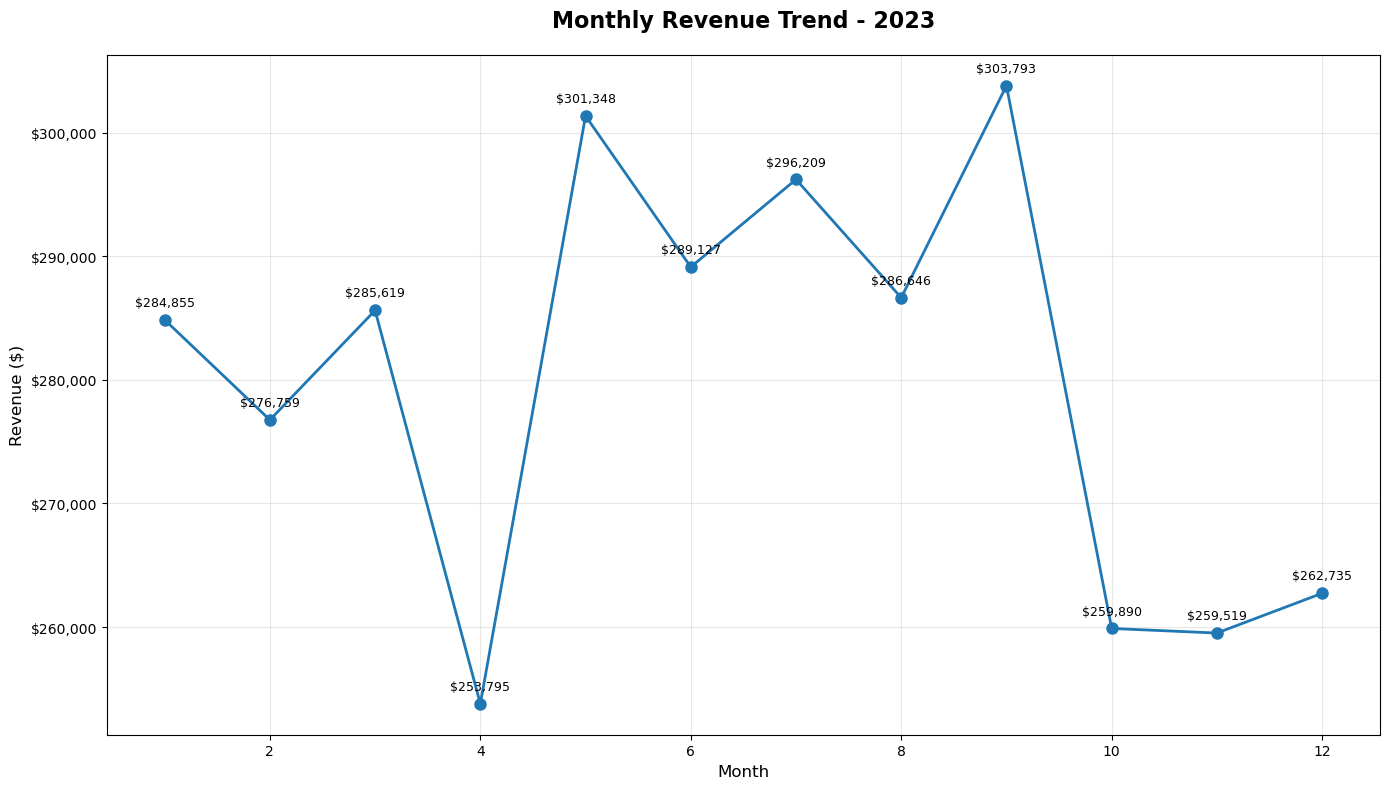


MONTHLY PERFORMANCE INSIGHTS:
Best Revenue Month: Month 9 ($303,793)
Lowest Revenue Month: Month 4 ($253,795)
Average Monthly Growth: -0.39%
Revenue Volatility (Std Dev): $17,285


In [8]:
# Monthly revenue trend visualization
visualizer = MetricsVisualizer(business_report)
revenue_fig = visualizer.plot_revenue_trend(figsize=(14, 8))
plt.show()

# Monthly trends analysis
monthly_trends = business_report['monthly_trends']
print(f"\nMONTHLY PERFORMANCE INSIGHTS:")
print(f"Best Revenue Month: Month {monthly_trends.loc[monthly_trends['revenue'].idxmax(), 'month']} (${monthly_trends['revenue'].max():,.0f})")
print(f"Lowest Revenue Month: Month {monthly_trends.loc[monthly_trends['revenue'].idxmin(), 'month']} (${monthly_trends['revenue'].min():,.0f})")
print(f"Average Monthly Growth: {monthly_trends['revenue_growth'].mean():.2f}%")
print(f"Revenue Volatility (Std Dev): ${monthly_trends['revenue'].std():,.0f}")

### 5.2 Product Category Performance {#product-analysis}

Understanding which product categories drive the most revenue and identifying growth opportunities.

TOP PRODUCT CATEGORIES - 2023
electronics               $ 1,401,359 ( 41.7%)
home_garden               $   862,653 ( 25.7%)
sports_outdoors           $   278,845 (  8.3%)
automotive                $   247,707 (  7.4%)
clothing_shoes_jewelry    $   232,745 (  6.9%)
toys_games                $    70,164 (  2.1%)
health_personal_care      $    65,370 (  1.9%)
tools_home_improvement    $    54,280 (  1.6%)
beauty_personal_care      $    49,213 (  1.5%)
books_media               $    38,559 (  1.1%)


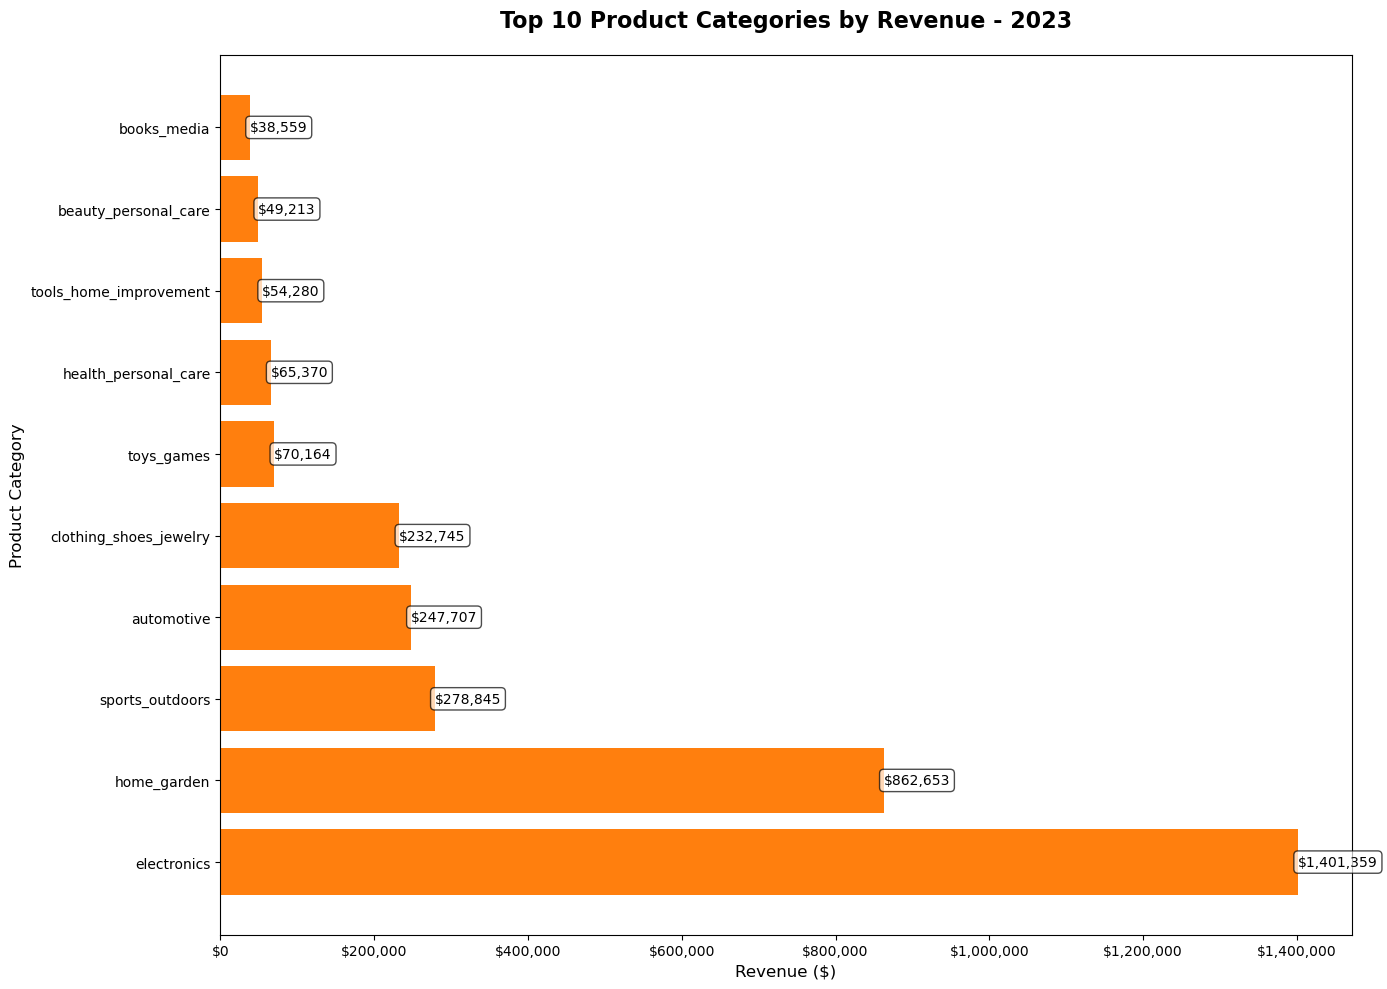


CATEGORY INSIGHTS:
Total Product Categories: 13
Top 5 Categories Revenue Share: 90.0%
Market Concentration: High


In [9]:
# Product category analysis
if 'error' not in business_report['product_performance']:
    product_data = business_report['product_performance']
    
    print(f"TOP PRODUCT CATEGORIES - {ANALYSIS_YEAR}")
    print("=" * 50)
    
    top_categories = product_data['top_categories'].head(10)
    for idx, row in top_categories.iterrows():
        print(f"{row['product_category_name']:<25} ${row['total_revenue']:>10,.0f} ({row['revenue_share']:>5.1f}%)")
    
    # Category performance visualization
    category_fig = visualizer.plot_category_performance(top_n=10, figsize=(14, 10))
    plt.show()
    
    # Category insights
    total_categories = len(product_data['all_categories'])
    top_5_share = top_categories.head(5)['revenue_share'].sum()
    
    print(f"\nCATEGORY INSIGHTS:")
    print(f"Total Product Categories: {total_categories}")
    print(f"Top 5 Categories Revenue Share: {top_5_share:.1f}%")
    print(f"Market Concentration: {'High' if top_5_share > 70 else 'Moderate' if top_5_share > 50 else 'Low'}")
else:
    print("Product category data not available for analysis")

### 5.3 Geographic Performance Analysis {#geographic-analysis}

Analyzing sales performance across different geographic regions to identify market opportunities.

In [10]:
# Geographic analysis
geo_data = business_report['geographic_performance']

if 'error' not in geo_data.columns:
    print(f"GEOGRAPHIC PERFORMANCE - {ANALYSIS_YEAR}")
    print("=" * 50)
    
    # Top performing states
    top_states = geo_data.head(10)
    print("TOP 10 STATES BY REVENUE:")
    for idx, row in top_states.iterrows():
        print(f"{row['state']:<3} ${row['revenue']:>10,.0f} ({row['orders']:>5,} orders, AOV: ${row['avg_order_value']:>7,.0f})")
    
    # Geographic heatmap
    geo_fig = visualizer.plot_geographic_heatmap()
    geo_fig.show()
    
    # Geographic insights
    total_states = len(geo_data)
    top_5_revenue = top_states.head(5)['revenue'].sum()
    total_revenue = geo_data['revenue'].sum()
    top_5_share = (top_5_revenue / total_revenue) * 100
    
    print(f"\nGEOGRAPHIC INSIGHTS:")
    print(f"States with Sales: {total_states}")
    print(f"Top 5 States Revenue Share: {top_5_share:.1f}%")
    print(f"Highest AOV State: {geo_data.loc[geo_data['avg_order_value'].idxmax(), 'state']} (${geo_data['avg_order_value'].max():,.0f})")
    print(f"Geographic Diversity: {'High' if total_states > 40 else 'Moderate' if total_states > 20 else 'Low'}")
else:
    print("Geographic data not available for analysis")

GEOGRAPHIC PERFORMANCE - 2023
TOP 10 STATES BY REVENUE:
CA  $   537,881 (  769 orders, AOV: $    699)
TX  $   403,303 (  561 orders, AOV: $    719)
FL  $   310,196 (  431 orders, AOV: $    720)
NY  $   253,112 (  384 orders, AOV: $    659)
IL  $   185,931 (  260 orders, AOV: $    715)
PA  $   173,261 (  225 orders, AOV: $    770)
OH  $   157,620 (  200 orders, AOV: $    788)
GA  $   146,415 (  190 orders, AOV: $    771)
MI  $   132,326 (  210 orders, AOV: $    630)
NC  $   128,315 (  177 orders, AOV: $    725)



GEOGRAPHIC INSIGHTS:
States with Sales: 20
Top 5 States Revenue Share: 50.3%
Highest AOV State: IN ($814)
Geographic Diversity: Low


### 5.4 Customer Experience Analysis {#customer-analysis}

Evaluating customer satisfaction through review scores and delivery performance metrics.

CUSTOMER SATISFACTION ANALYSIS - 2023
Average Review Score: 4.10/5.0
Total Reviews: 3,225
5-Star Reviews: 34.7%
4+ Star Reviews: 51.6%
Low Satisfaction (1-2 stars): 7.2%


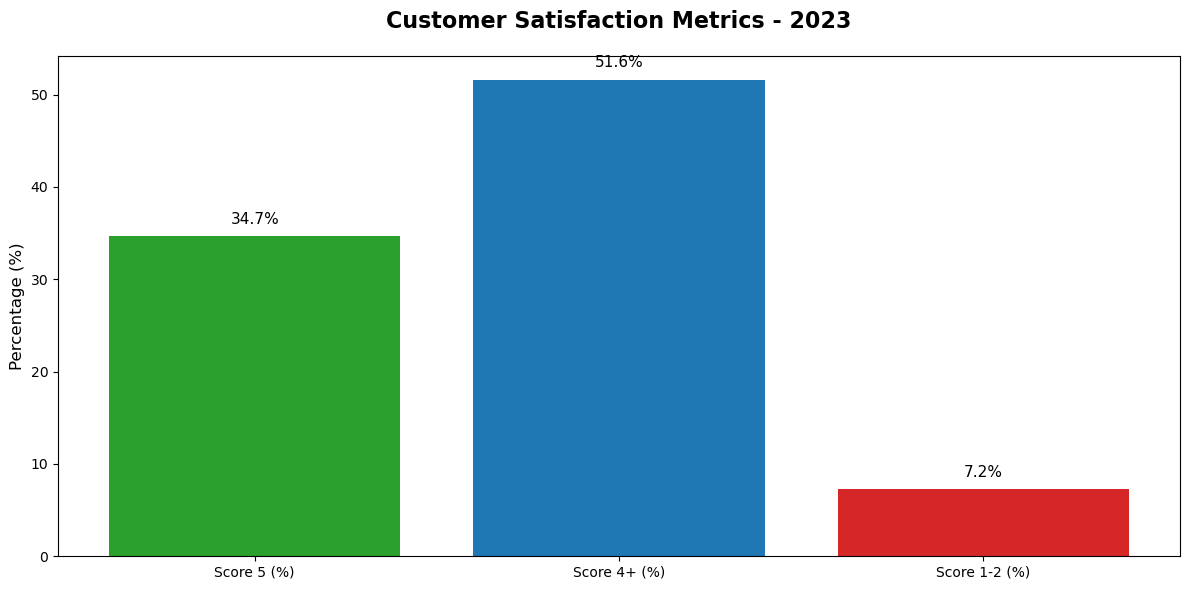


SATISFACTION INSIGHTS:
Overall Satisfaction Level: Good


In [11]:
# Customer satisfaction analysis
satisfaction_metrics = business_report['customer_satisfaction']

if 'error' not in satisfaction_metrics:
    print(f"CUSTOMER SATISFACTION ANALYSIS - {ANALYSIS_YEAR}")
    print("=" * 50)
    print(f"Average Review Score: {satisfaction_metrics['avg_review_score']:.2f}/5.0")
    print(f"Total Reviews: {satisfaction_metrics['total_reviews']:,}")
    print(f"5-Star Reviews: {satisfaction_metrics['score_5_percentage']:.1f}%")
    print(f"4+ Star Reviews: {satisfaction_metrics['score_4_plus_percentage']:.1f}%")
    print(f"Low Satisfaction (1-2 stars): {satisfaction_metrics['score_1_2_percentage']:.1f}%")
    
    # Review distribution visualization
    review_fig = visualizer.plot_review_distribution(figsize=(12, 6))
    plt.show()
    
    # Satisfaction insights
    avg_score = satisfaction_metrics['avg_review_score']
    satisfaction_level = 'Excellent' if avg_score >= 4.5 else 'Good' if avg_score >= 4.0 else 'Fair' if avg_score >= 3.5 else 'Poor'
    
    print(f"\nSATISFACTION INSIGHTS:")
    print(f"Overall Satisfaction Level: {satisfaction_level}")
    if satisfaction_metrics['score_4_plus_percentage'] >= 80:
        print("✅ Strong customer satisfaction (80%+ give 4+ stars)")
    elif satisfaction_metrics['score_1_2_percentage'] > 10:
        print("⚠️ Significant dissatisfaction detected (>10% give 1-2 stars)")
else:
    print("Customer satisfaction data not available for analysis")

In [12]:
# Delivery performance analysis
delivery_metrics = business_report['delivery_performance']

if 'error' not in delivery_metrics:
    print(f"DELIVERY PERFORMANCE ANALYSIS - {ANALYSIS_YEAR}")
    print("=" * 50)
    print(f"Average Delivery Time: {delivery_metrics['avg_delivery_days']:.1f} days")
    print(f"Median Delivery Time: {delivery_metrics['median_delivery_days']:.1f} days")
    print(f"Fast Delivery (≤3 days): {delivery_metrics['fast_delivery_percentage']:.1f}%")
    print(f"Slow Delivery (>7 days): {delivery_metrics['slow_delivery_percentage']:.1f}%")
    
    # Delivery performance evaluation
    avg_delivery = delivery_metrics['avg_delivery_days']
    delivery_rating = 'Excellent' if avg_delivery <= 3 else 'Good' if avg_delivery <= 5 else 'Fair' if avg_delivery <= 7 else 'Poor'
    
    print(f"\nDELIVERY INSIGHTS:")
    print(f"Delivery Performance Rating: {delivery_rating}")
    
    if delivery_metrics['fast_delivery_percentage'] >= 30:
        print("✅ Strong fast delivery capability")
    if delivery_metrics['slow_delivery_percentage'] > 20:
        print("⚠️ High percentage of slow deliveries needs attention")
        
    # Delivery speed impact on satisfaction
    if 'error' not in satisfaction_metrics:
        print(f"\nDELIVERY-SATISFACTION CORRELATION:")
        # This would require more detailed analysis of the relationship
        print(f"Average satisfaction score: {satisfaction_metrics['avg_review_score']:.2f}")
        print(f"Fast delivery rate: {delivery_metrics['fast_delivery_percentage']:.1f}%")
else:
    print("Delivery performance data not available for analysis")

DELIVERY PERFORMANCE ANALYSIS - 2023
Average Delivery Time: 8.0 days
Median Delivery Time: 8.0 days
Fast Delivery (≤3 days): 7.2%
Slow Delivery (>7 days): 55.6%

DELIVERY INSIGHTS:
Delivery Performance Rating: Poor
⚠️ High percentage of slow deliveries needs attention

DELIVERY-SATISFACTION CORRELATION:
Average satisfaction score: 4.10
Fast delivery rate: 7.2%


## 6. Summary of Key Observations {#summary}

### Executive Summary

Based on the comprehensive analysis of the e-commerce data, here are the key findings and recommendations:

In [13]:
# Generate executive summary
print(f"EXECUTIVE SUMMARY - {ANALYSIS_YEAR} BUSINESS PERFORMANCE")
print("=" * 60)

# Key metrics summary
revenue_metrics = business_report['revenue_metrics']
print(f"\n📊 FINANCIAL PERFORMANCE:")
print(f"   • Total Revenue: ${revenue_metrics['total_revenue']:,.0f}")
print(f"   • Total Orders: {revenue_metrics['total_orders']:,}")
print(f"   • Average Order Value: ${revenue_metrics['average_order_value']:,.0f}")

if 'revenue_growth_rate' in revenue_metrics:
    growth_direction = "📈" if revenue_metrics['revenue_growth_rate'] > 0 else "📉"
    print(f"   • Revenue Growth: {growth_direction} {revenue_metrics['revenue_growth_rate']:+.1f}% vs {COMPARISON_YEAR}")

# Product insights
if 'error' not in business_report['product_performance']:
    top_category = business_report['product_performance']['top_categories'].iloc[0]
    print(f"\n🛍️ PRODUCT PERFORMANCE:")
    print(f"   • Top Category: {top_category['product_category_name']} (${top_category['total_revenue']:,.0f})")
    print(f"   • Category Market Share: {top_category['revenue_share']:.1f}%")

# Geographic insights
geo_data = business_report['geographic_performance']
if 'error' not in geo_data.columns:
    top_state = geo_data.iloc[0]
    print(f"\n🗺️ GEOGRAPHIC PERFORMANCE:")
    print(f"   • Top Market: {top_state['state']} (${top_state['revenue']:,.0f})")
    print(f"   • Active Markets: {len(geo_data)} states")

# Customer experience
if 'error' not in business_report['customer_satisfaction']:
    satisfaction = business_report['customer_satisfaction']
    print(f"\n⭐ CUSTOMER EXPERIENCE:")
    print(f"   • Average Rating: {satisfaction['avg_review_score']:.1f}/5.0")
    print(f"   • High Satisfaction: {satisfaction['score_4_plus_percentage']:.0f}% (4+ stars)")

if 'error' not in business_report['delivery_performance']:
    delivery = business_report['delivery_performance']
    print(f"   • Average Delivery: {delivery['avg_delivery_days']:.1f} days")
    print(f"   • Fast Delivery: {delivery['fast_delivery_percentage']:.0f}% (≤3 days)")

print(f"\n" + "=" * 60)

EXECUTIVE SUMMARY - 2023 BUSINESS PERFORMANCE

📊 FINANCIAL PERFORMANCE:
   • Total Revenue: $3,360,295
   • Total Orders: 4,635
   • Average Order Value: $725
   • Revenue Growth: 📉 -2.5% vs 2022

🛍️ PRODUCT PERFORMANCE:
   • Top Category: electronics ($1,401,359)
   • Category Market Share: 41.7%

🗺️ GEOGRAPHIC PERFORMANCE:
   • Top Market: CA ($537,881)
   • Active Markets: 20 states

⭐ CUSTOMER EXPERIENCE:
   • Average Rating: 4.1/5.0
   • High Satisfaction: 52% (4+ stars)
   • Average Delivery: 8.0 days
   • Fast Delivery: 7% (≤3 days)



### Strategic Recommendations

Based on the analysis results, here are the key strategic recommendations:

In [14]:
# Generate recommendations based on analysis
print("STRATEGIC RECOMMENDATIONS")
print("=" * 40)

recommendations = []

# Revenue-based recommendations
if 'revenue_growth_rate' in revenue_metrics:
    if revenue_metrics['revenue_growth_rate'] < 0:
        recommendations.append("🔴 PRIORITY: Address negative revenue growth through customer acquisition and retention strategies")
    elif revenue_metrics['revenue_growth_rate'] < 5:
        recommendations.append("🟡 Focus on accelerating growth through market expansion and product diversification")
    else:
        recommendations.append("🟢 Maintain strong growth momentum while optimizing operational efficiency")

# Product recommendations
if 'error' not in business_report['product_performance']:
    top_5_share = business_report['product_performance']['top_categories'].head(5)['revenue_share'].sum()
    if top_5_share > 70:
        recommendations.append("📦 Consider diversifying product portfolio to reduce dependency on top categories")
    else:
        recommendations.append("📦 Leverage balanced product portfolio to explore cross-selling opportunities")

# Customer experience recommendations
if 'error' not in business_report['customer_satisfaction']:
    satisfaction = business_report['customer_satisfaction']
    if satisfaction['avg_review_score'] < 4.0:
        recommendations.append("⭐ PRIORITY: Improve customer satisfaction through quality and service enhancements")
    if satisfaction['score_1_2_percentage'] > 10:
        recommendations.append("⚠️ Address root causes of customer dissatisfaction to reduce negative reviews")

# Delivery recommendations
if 'error' not in business_report['delivery_performance']:
    delivery = business_report['delivery_performance']
    if delivery['avg_delivery_days'] > 7:
        recommendations.append("🚚 PRIORITY: Optimize logistics to reduce average delivery time")
    if delivery['fast_delivery_percentage'] < 20:
        recommendations.append("⚡ Invest in fast delivery capabilities to improve customer experience")

# Geographic recommendations
geo_data = business_report['geographic_performance']
if 'error' not in geo_data.columns:
    if len(geo_data) < 30:
        recommendations.append("🗺️ Explore expansion opportunities in underserved geographic markets")

# Display recommendations
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

if not recommendations:
    print("✅ Business performance appears strong across all analyzed metrics")

print("\n" + "=" * 40)
print(f"Analysis completed for {ANALYSIS_YEAR}")
if COMPARISON_YEAR:
    print(f"Comparison baseline: {COMPARISON_YEAR}")
print(f"Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

STRATEGIC RECOMMENDATIONS
1. 🔴 PRIORITY: Address negative revenue growth through customer acquisition and retention strategies
2. 📦 Consider diversifying product portfolio to reduce dependency on top categories
3. 🚚 PRIORITY: Optimize logistics to reduce average delivery time
4. ⚡ Invest in fast delivery capabilities to improve customer experience
5. 🗺️ Explore expansion opportunities in underserved geographic markets

Analysis completed for 2023
Comparison baseline: 2022
Generated on: 2025-08-12 11:45:10


---

## Analysis Configuration Summary

This notebook provides a comprehensive, configurable framework for e-commerce business analysis. Key features:

- **Configurable Time Periods**: Easily adjust analysis and comparison years
- **Modular Architecture**: Reusable data loading and metrics calculation modules
- **Comprehensive Metrics**: Revenue, product, geographic, and customer experience analysis
- **Visual Insights**: Interactive charts and geographic visualizations
- **Strategic Recommendations**: Data-driven business insights and action items

### Next Steps

1. **Regular Monitoring**: Schedule monthly/quarterly runs of this analysis
2. **Deeper Segmentation**: Analyze specific customer segments or product lines
3. **Predictive Analytics**: Implement forecasting models for future planning
4. **A/B Testing**: Design experiments to test strategic recommendations
5. **Real-time Dashboards**: Create live dashboards for ongoing monitoring

---

*This analysis framework is designed to be easily maintained and extended for future business intelligence needs.*